# Demonstration 3: Transition to Depression

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import Helplessness
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
img_dir = os.path.join('..','figures')
%matplotlib inline

## Value Iteration

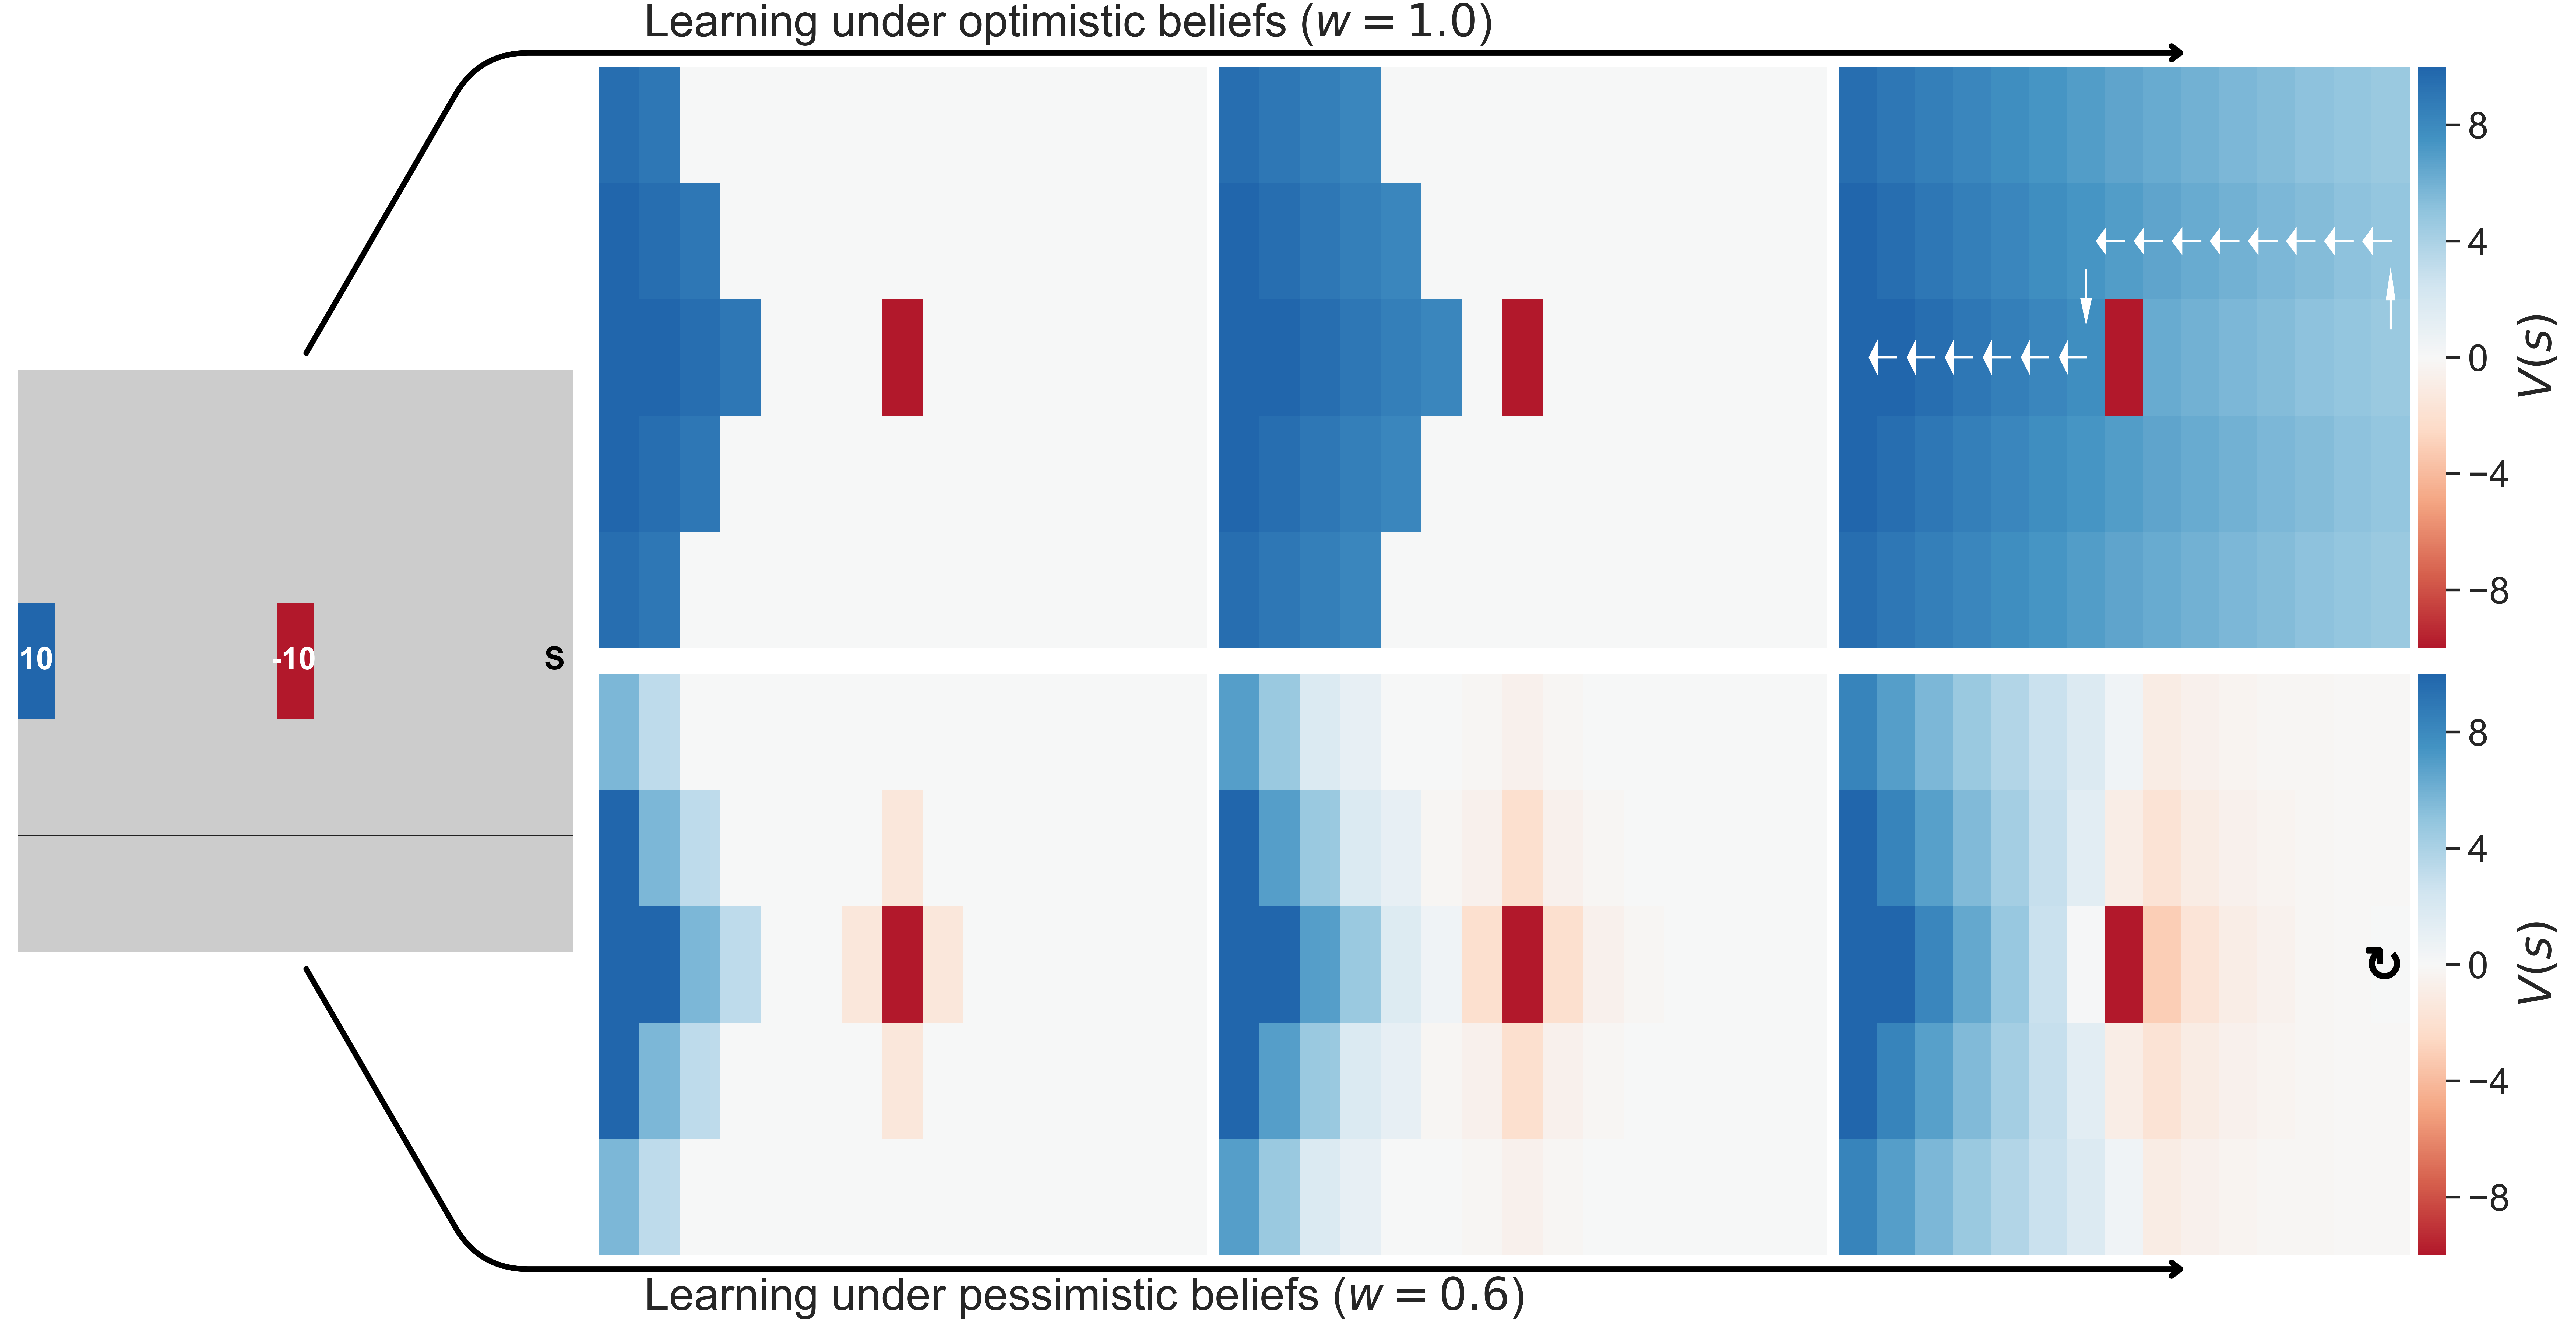

In [2]:
import matplotlib as mpl
from sisyphus.mdp import ValueIteration
from palettable.colorbrewer.diverging import RdBu_9 as palette
mpl.rcParams['figure.dpi']= 600

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
weights = [1.0, 0.6]
gamma = 0.95
max_iters = [3,5,100]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize figure.
fig = plt.figure(figsize=(16,8))
cmap = palette.get_mpl_colormap()
colors = palette.hex_colors

## Initialize plots.
gs0 = gridspec.GridSpec(1,1)
gs0.update(left=0.01, right=0.225, bottom=0.275, top=0.725, hspace=0, wspace=0.02)

gs1 = gridspec.GridSpec(1,3)
gs1.update(left=0.235, right=0.95, bottom=0.51, top=0.96, hspace=0, wspace=0.02)

gs2 = gridspec.GridSpec(1,3)
gs2.update(left=0.235, right=0.95, bottom=0.04, top=0.49, hspace=0, wspace=0.02)

gs = [gs1,gs2]

## Initialize environment.
gym = Helplessness()

## Main loop.
for i, w in enumerate(weights):
        
    for j, max_iter in enumerate(max_iters):
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Value iteration.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
        ## Initialize agent.
        qvi = ValueIteration(policy='pessimism', gamma=gamma, w=w, max_iter=max_iter)
        
        ## Solve for Q-values.
        qvi = qvi.fit(gym, verbose=False)
        
        ## Fill in terminal states.
        V = qvi.V[np.arange(qvi.V.size) != 45].copy()
        V[gym.terminal[:2]] = [10,-10]
        V = V.reshape(5, 15)
            
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Plotting.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
        ## Plot value.
        ax = plt.subplot(gs[i][j])
        if j == 2:
            
            ## Setup colorbar.
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)  
            
            ## Plot value.
            sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=True,
                        xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cax)
            
            ## Update colorbar.
            cbar = ax.collections[0].colorbar
            cbar.set_label(r'$V(s)$', fontsize=20)
            
        else:
            
            ## Plot value.
            sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=False,
                        xticklabels=[], yticklabels=[], ax=ax)
            
        ## Plot policy.
        if j == 2 and w == 1:
            
            ax = gym.plot_policy(ax, qvi.pi, color='w', head_width=0.15)
            
        elif j == 2:
            
            ax.scatter(14.25, 2.5, s=250, marker=r'$\circlearrowright$', color='k')
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot environment.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Plot environment.
ax = plt.subplot(gs0[0])
ax = gym.plot_lh(reward_color=colors[-1], punishment_color=colors[0], ax=ax, 
                 annot_kws=dict(fontsize=14,fontweight='bold',color='w'))
  
## Add arrows.
ax.annotate('', xy=(0.85, 0.96), xytext=(0.118, 0.73), xycoords='figure fraction',
             arrowprops=dict(connectionstyle="angle,angleA= 60,angleB=0,rad=180",
                             arrowstyle="->,head_width=0.3",color='k',lw=2.5))
ax.annotate(r'Learning under optimistic beliefs ($w=1.0$)', xy=(0,0), xytext=(0.25,0.965), 
            xycoords='figure fraction', ha='left', va='bottom', fontsize=20)

ax.annotate('', xy=(0.85, 0.04), xytext=(0.118, 0.27), xycoords='figure fraction',
             arrowprops=dict(connectionstyle="angle,angleA=-60,angleB=0,rad=180",
                             arrowstyle="->,head_width=0.3",color='k',lw=2.5))
ax.annotate(r'Learning under pessimistic beliefs ($w=0.6$)', xy=(0,0), xytext=(0.25,0.035), 
            xycoords='figure fraction', ha='left', va='top', fontsize=20)

plt.savefig(os.path.join(img_dir, '03_lh.png'), dpi=600)